In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from monte_carlo_simulator import monte_carlo_simulator
from earth_data_plot import distribution_plot, logged_distribution_plot, correlation_plot

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [4]:
df = pd.read_excel("微量7000（去斜杠）.xlsx")
df.head()

,数据质量,是否交代,CITATION,SAMPLE NAME,TECTONIC SETTING,LOCATION,LOCATION COMMENT,LATITUDE (MIN.),LATITUDE (MAX.),LONGITUDE (MIN.),...,ER(PPM),TM(PPM),YB(PPM),LU(PPM),HF(PPM),TA(PPM),PB(PPM),TH(PPM),U(PPM),总计数量
0,A,222.0,[23616] LI XIAOHUI (2020),samp. C11,CONVERGENT MARGIN,RYUKYU ARC / OKINAWA TROUGH,IHEYA RIDGE,27.5193,27.5193,126.9378,...,10.75,1.400,10.43,1.570,1.86,0.012,0.380,0.2170,0.071,44
1,A,222.0,[23616] LI XIAOHUI (2020),samp. C11,CONVERGENT MARGIN,RYUKYU ARC / OKINAWA TROUGH,IHEYA RIDGE,27.5193,27.5193,126.9378,...,10.53,1.517,11.51,1.658,1.40,0.000,0.000,0.0268,0.000,44
2,A,222.0,[23616] LI XIAOHUI (2020),samp. C11,CONVERGENT MARGIN,RYUKYU ARC / OKINAWA TROUGH,IHEYA RIDGE,27.5193,27.5193,126.9378,...,11.98,1.650,12.18,1.720,1.77,0.000,0.133,0.1600,0.056,44
3,A,222.0,[23616] LI XIAOHUI (2020),samp. R2,CONVERGENT MARGIN,RYUKYU ARC / OKINAWA TROUGH,IHEYA RIDGE,27.5412,27.5412,126.9770,...,1.60,0.210,1.66,0.197,0.70,0.071,0.000,0.3070,0.000,44
4,A,222.0,[23616] LI XIAOHUI (2020),samp. T2,CONVERGENT MARGIN,RYUKYU ARC / OKINAWA TROUGH,IHEYA RIDGE,27.5460,27.5460,126.9753,...,7.22,0.987,7.38,0.875,2.64,0.031,0.550,0.4800,0.134,44


In [5]:
df.columns

Index(['数据质量', '是否交代', 'CITATION', 'SAMPLE NAME', 'TECTONIC SETTING',
       'LOCATION', 'LOCATION COMMENT', 'LATITUDE (MIN.)', 'LATITUDE (MAX.)',
       'LONGITUDE (MIN.)', 'LONGITUDE (MAX.)', 'LAND/SEA (SAMPLING)',
       'ELEVATION (MIN.)', 'ELEVATION (MAX.)', 'ROCK NAME', 'ROCK TEXTURE',
       'DRILLING DEPTH (MIN.)', 'DRILLING DEPTH (MAX.)', 'ALTERATION',
       'MINERAL', 'SPOT', 'CRYSTAL', 'RIM/CORE (MINERAL GRAINS)',
       'PRIMARY/SECONDARY', 'SC(PPM)', 'TI(PPM)', 'V(PPM)', 'CR(PPM)',
       'NI(PPM)', 'RB(PPM)', 'SR(PPM)', 'Y(PPM)', 'ZR(PPM)', 'NB(PPM)',
       'BA(PPM)', 'LA(PPM)', 'CE(PPM)', 'PR(PPM)', 'ND(PPM)', 'SM(PPM)',
       'EU(PPM)', 'GD(PPM)', 'TB(PPM)', 'DY(PPM)', 'HO(PPM)', 'ER(PPM)',
       'TM(PPM)', 'YB(PPM)', 'LU(PPM)', 'HF(PPM)', 'TA(PPM)', 'PB(PPM)',
       'TH(PPM)', 'U(PPM)', '总计数量'],
      dtype='object')

In [6]:
num_cols = ['SC(PPM)', 'TI(PPM)', 'V(PPM)', 'CR(PPM)',
       'NI(PPM)', 'RB(PPM)', 'SR(PPM)', 'Y(PPM)', 'ZR(PPM)', 'NB(PPM)',
       'BA(PPM)', 'LA(PPM)', 'CE(PPM)', 'PR(PPM)', 'ND(PPM)', 'SM(PPM)',
       'EU(PPM)', 'GD(PPM)', 'TB(PPM)', 'DY(PPM)', 'HO(PPM)', 'ER(PPM)',
       'TM(PPM)', 'YB(PPM)', 'LU(PPM)', 'HF(PPM)', 'TA(PPM)', 'PB(PPM)',
       'TH(PPM)', 'U(PPM)']

### Simple EDA

In [7]:
df[num_cols].isnull().mean().sort_values(ascending=False)

TI(PPM)    0.298883
CR(PPM)    0.207516
RB(PPM)    0.177832
NI(PPM)    0.121596
BA(PPM)    0.100899
TA(PPM)    0.094635
PB(PPM)    0.083197
SC(PPM)    0.076934
U(PPM)     0.073802
TM(PPM)    0.054602
TH(PPM)    0.053105
TB(PPM)    0.043845
V(PPM)     0.042484
HO(PPM)    0.033769
NB(PPM)    0.022059
HF(PPM)    0.013889
PR(PPM)    0.006536
LU(PPM)    0.003949
LA(PPM)    0.003813
CE(PPM)    0.003268
SM(PPM)    0.003132
ND(PPM)    0.002996
YB(PPM)    0.002451
ER(PPM)    0.001770
Y(PPM)     0.000953
SR(PPM)    0.000681
ZR(PPM)    0.000272
EU(PPM)    0.000272
DY(PPM)    0.000136
GD(PPM)    0.000000
dtype: float64

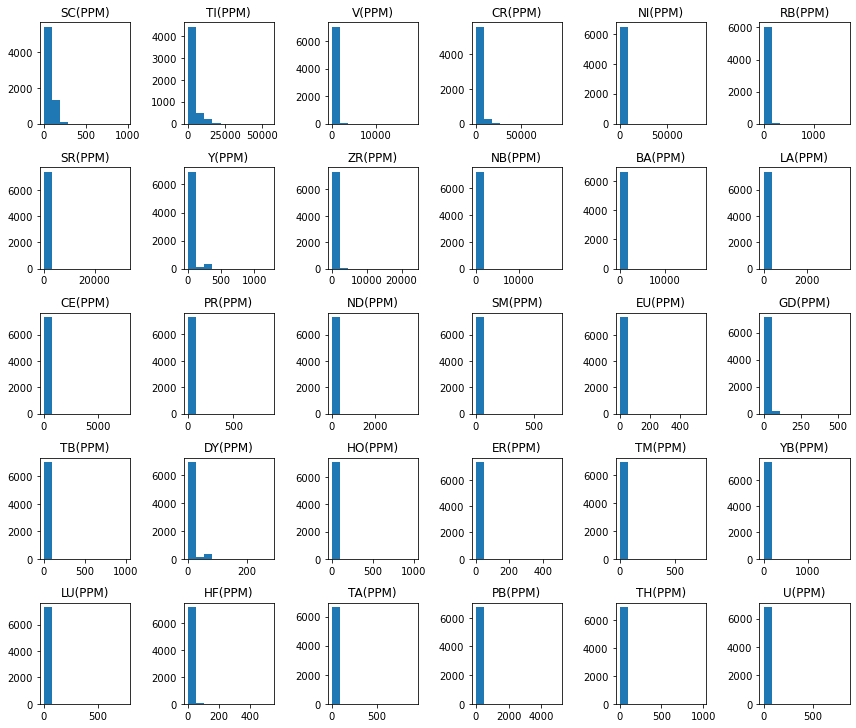

In [8]:
distribution_plot(num_cols, df)

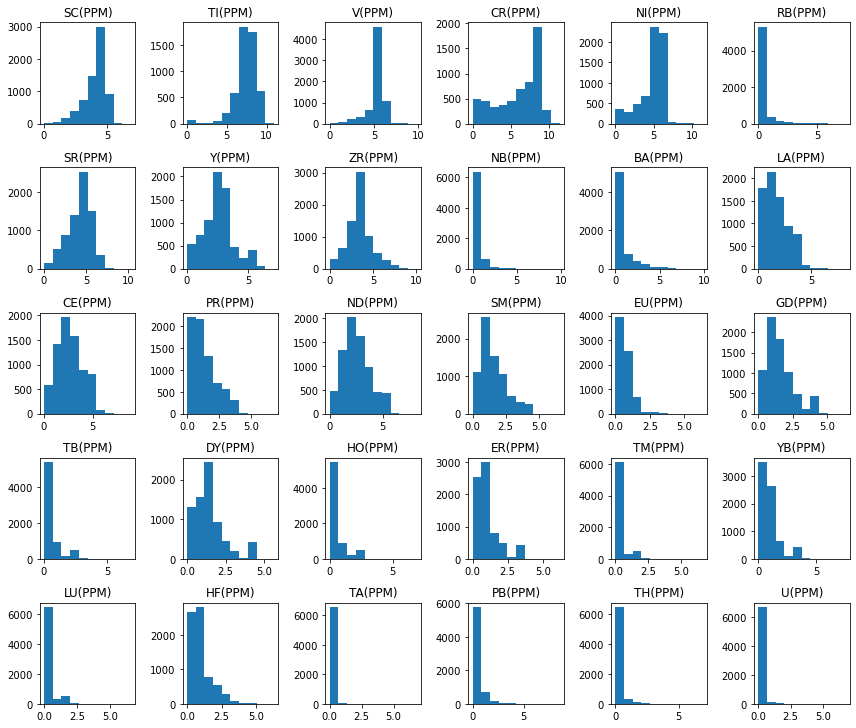

In [9]:
logged_distribution_plot(num_cols, df)

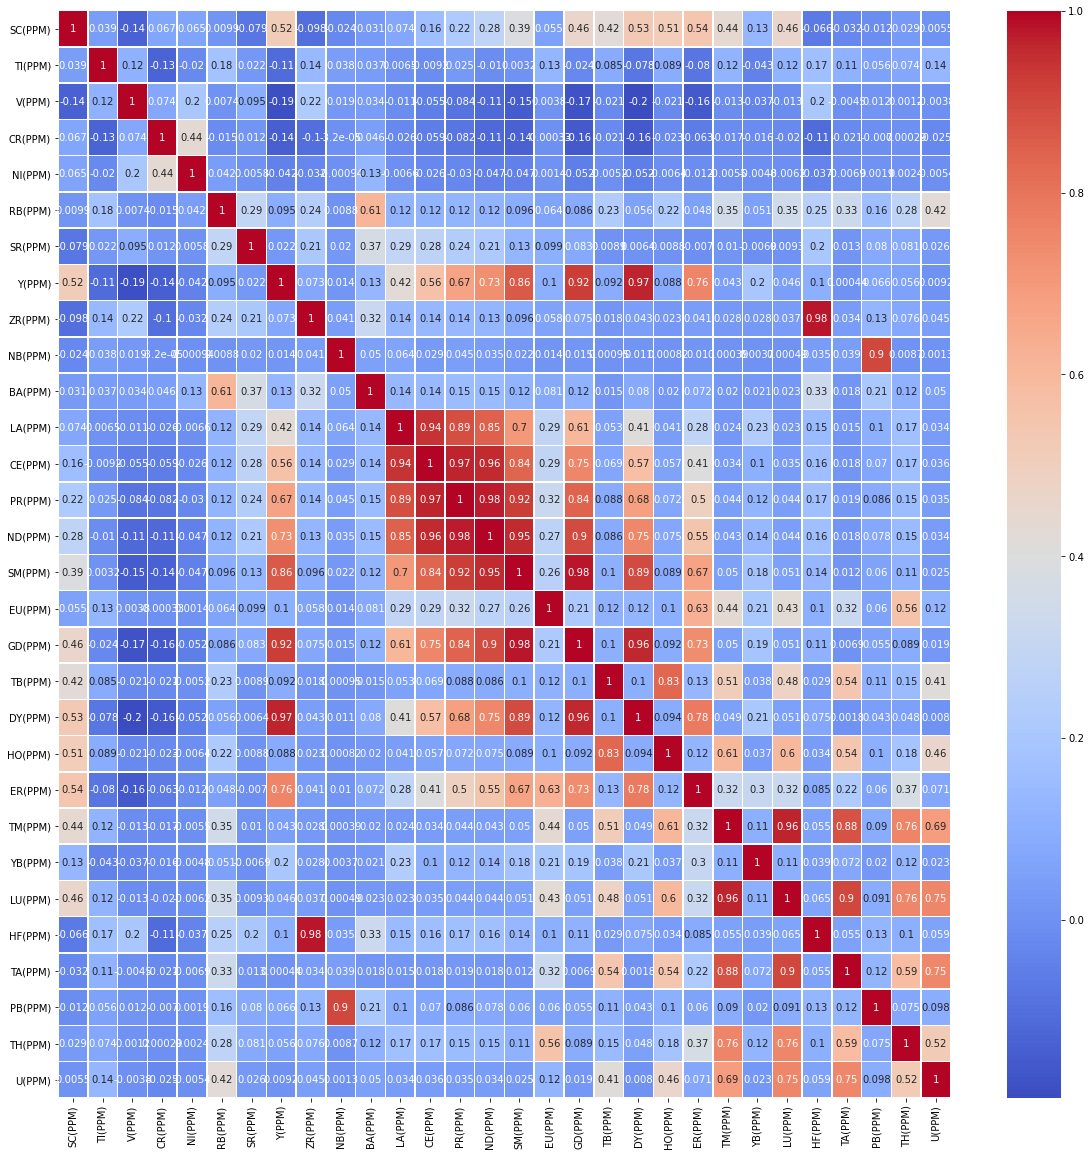

In [10]:
correlation_plot(num_cols, df)

### Impute missing values
#### Use KNN imputation method as an example

In [11]:
from sklearn.impute import KNNImputer

In [12]:
df_miss = df[num_cols]

knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
df_miss_knn = knn_imputer.fit_transform(df_miss)
df_miss_knn = pd.DataFrame(df_miss_knn, columns=num_cols)

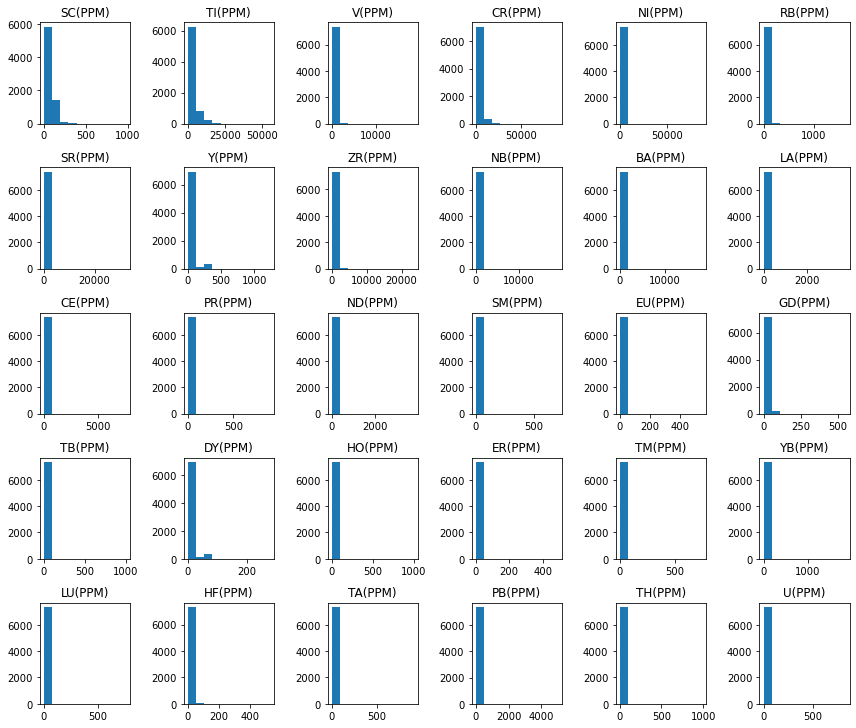

In [13]:
distribution_plot(num_cols, df_miss_knn)

### Use monte_carlo_simulator to test if the distributions before & after the imputation statistically differ from each other

In [14]:
# 100 simulations with Wilcoxon test
monte_carlo_simulator(df_miss, df_miss_knn, sample_size = 50, 
                      iteration = 100, test = 'wilcoxon', confidence = 0.05)

Index(['TI(PPM)', 'CR(PPM)', 'NI(PPM)', 'RB(PPM)', 'SR(PPM)', 'Y(PPM)',
       'ZR(PPM)', 'LA(PPM)', 'CE(PPM)', 'ND(PPM)', 'SM(PPM)', 'EU(PPM)',
       'GD(PPM)', 'DY(PPM)', 'ER(PPM)'],
      dtype='object')

In [16]:
# 100 simulations with Kruskal-Wallis test
monte_carlo_simulator(df_miss, df_miss_knn, sample_size = 50, 
                      iteration = 100, test = 'kruskal', confidence = 0.05)

Index([], dtype='object')

In [17]:
# 1000 simulations with Wilcoxon test
monte_carlo_simulator(df_miss, df_miss_knn, sample_size = 100, 
                      iteration = 100, test = 'wilcoxon', confidence = 0.05)

Index(['SC(PPM)', 'TI(PPM)', 'CR(PPM)', 'NI(PPM)', 'RB(PPM)', 'SR(PPM)',
       'Y(PPM)', 'ZR(PPM)', 'BA(PPM)', 'EU(PPM)', 'GD(PPM)', 'DY(PPM)',
       'TA(PPM)', 'PB(PPM)', 'U(PPM)'],
      dtype='object')

In [18]:
# 1000 simulations with Kruskal-Wallis test
monte_carlo_simulator(df_miss, df_miss_knn, sample_size = 200, 
                      iteration = 100, test = 'kruskal', confidence = 0.05)

Index([], dtype='object')

In [16]:
# # 10000 simulations with Wilcoxon test
# monte_carlo_simulator(df_miss, df_miss_knn, sample_size = 200, 
#                       iteration = 10000, test = 'wilcoxon', confidence = 0.05)

In [17]:
# # 10000 simulations with Kruskal-Wallis test
# monte_carlo_simulator(df_miss, df_miss_knn, sample_size = 200, 
#                       iteration = 10000, test = 'kruskal', confidence = 0.05)

### Use Probability Plots to see if the distributions before & after the imputation statistically differ from each other

In [19]:
from earth_data_plot import probability_plot

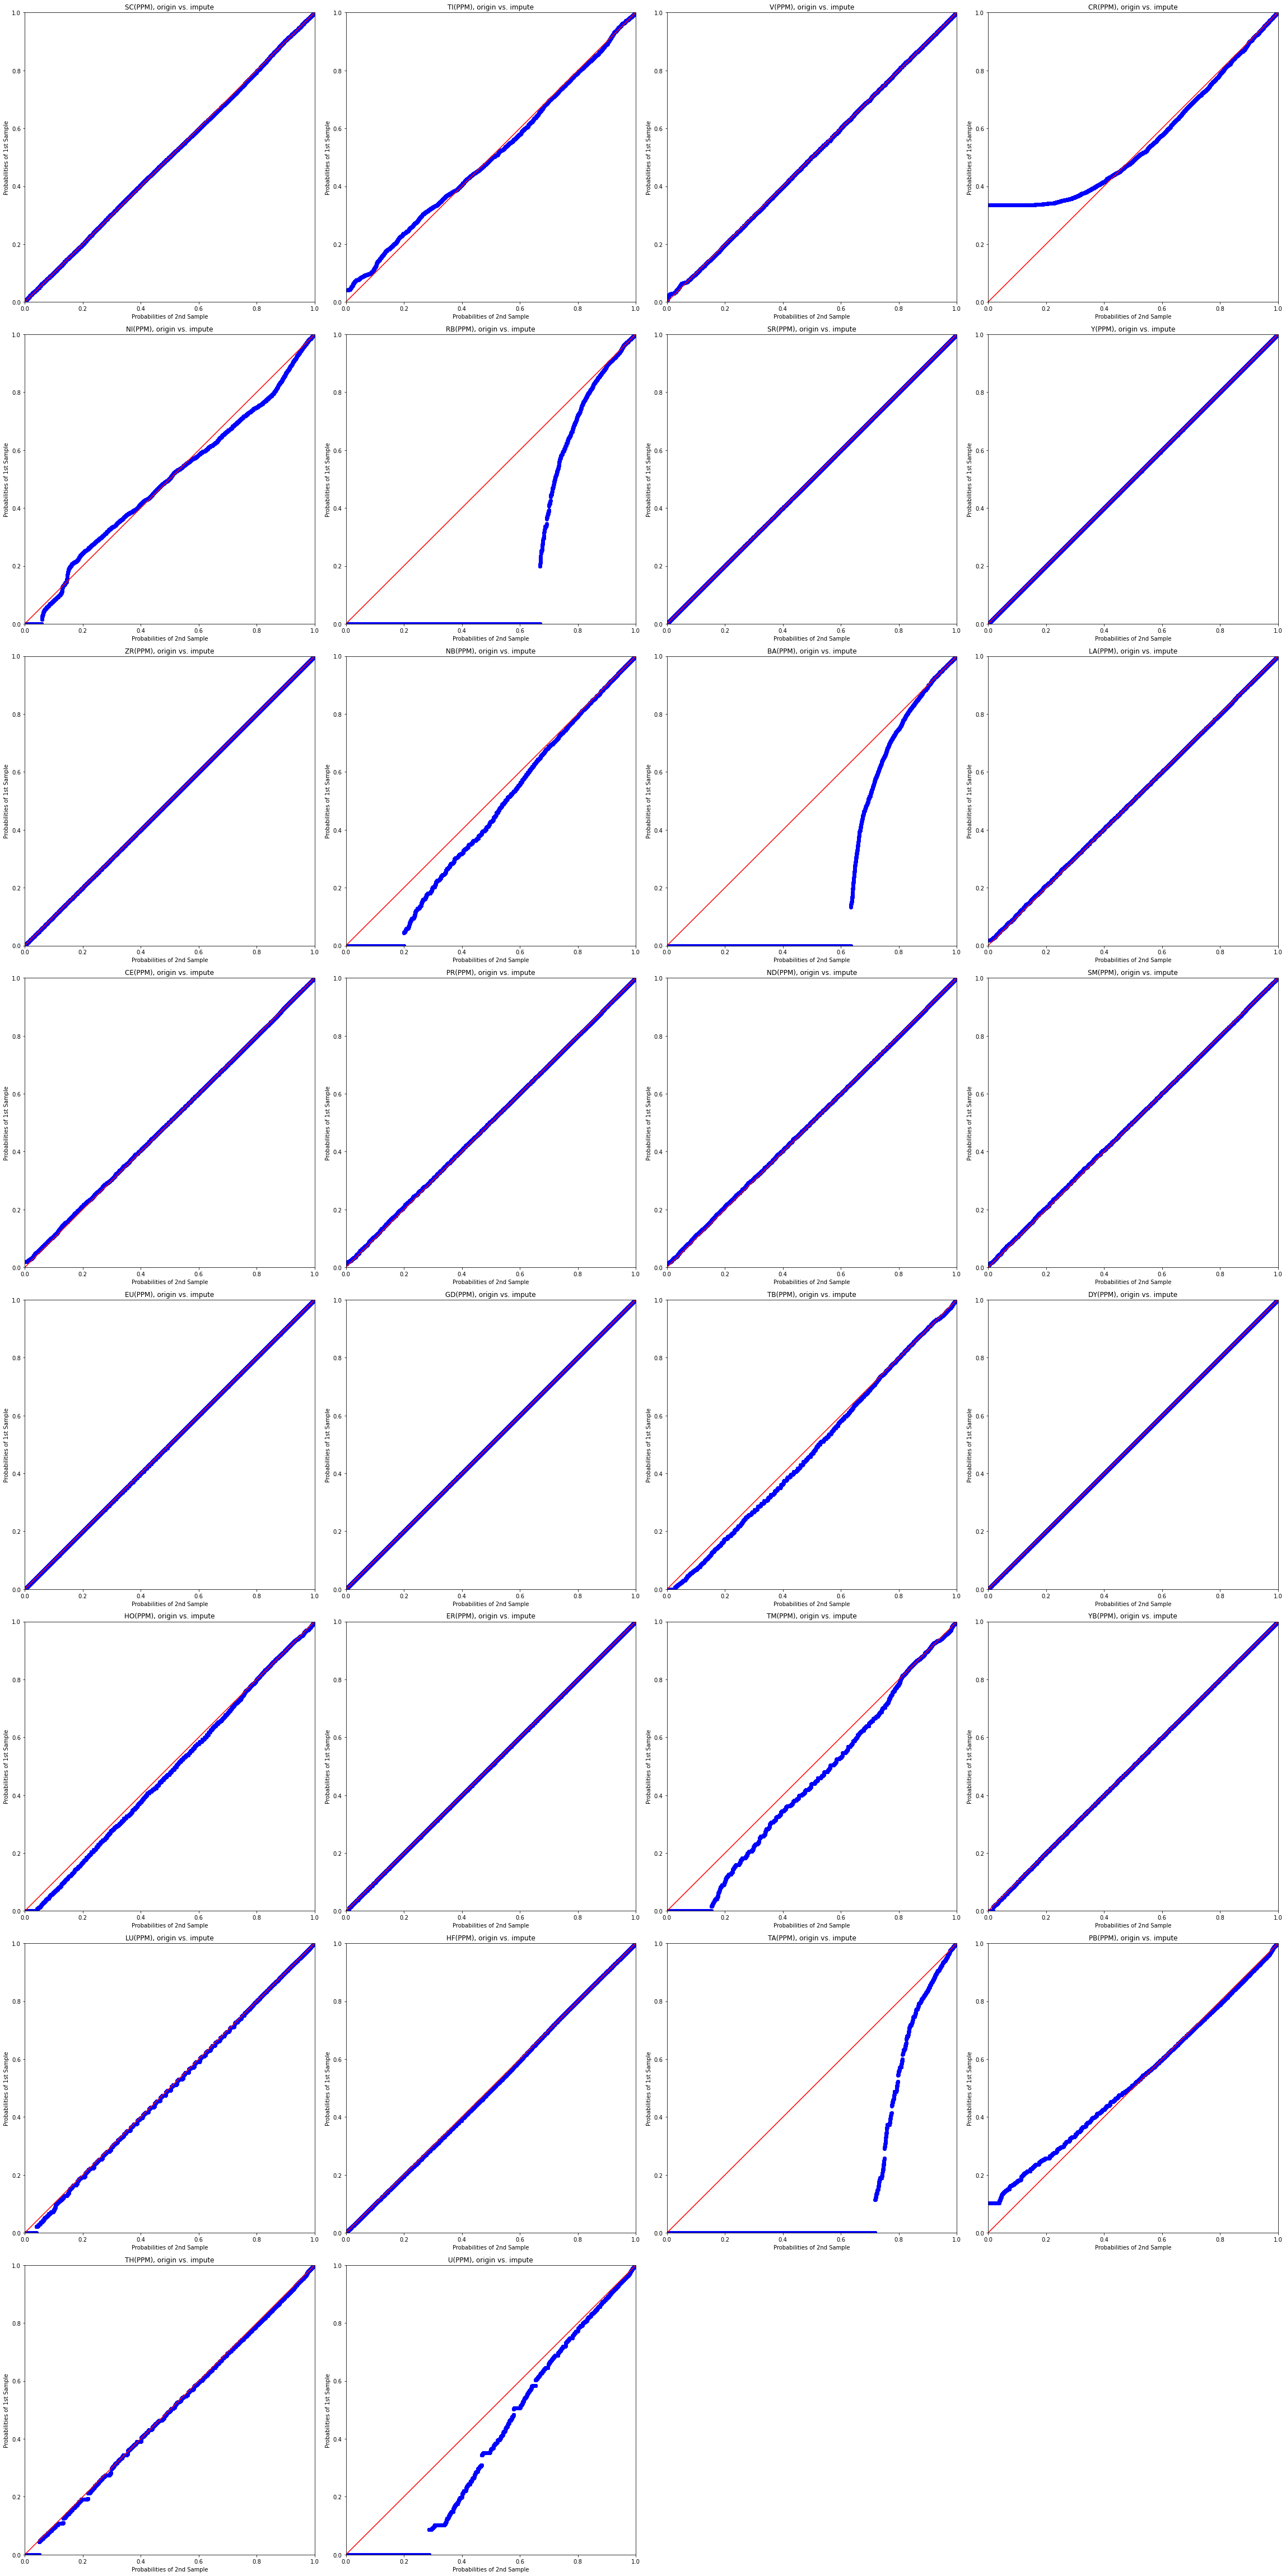

In [20]:
probability_plot(num_cols, df_miss, df_miss_knn)